# Exploratory analysis scratch pad for work done to support CAL research on FF foundation funding of academia
Lindsey Gulden, 2025
lindsey@legupdata.com

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils.calcs import odds_ratio
import pandas as pd

# Living on the edge w/o warning text
import warnings

warnings.filterwarnings("ignore")

# automagically make the code pretty
%load_ext jupyter_black

## Read data, describe

In [2]:
ff_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/foundation/data/grant_recipient_linked.csv",
    dtype={"ein": str, "unitid": str, "year": int},
)


ff_df["tier1_research"] = [1 if (x == 1) else 0 for x in ff_df.research2025]

#
n_schools = ff_df.carnegie_matched.nunique()
n_grants = len(ff_df)
total_nominal = ff_df.grant_amount.sum()
total_2024 = ff_df.grant_amount_2024_usd.sum()


print(
    f" Analysis dataset contains {n_grants:.0f} grants made to {n_schools:.0f} institutions of higher education"
)
print(
    f" Total contributions to universities between 2003 and 2024 were ${total_nominal:,.0f} [nominal USD]"
)
print(
    f" Total contributions to universities between 2003 and 2024 were ${total_2024:,.0f} [2024 USD]"
)
print("Fraction of grants that were from corporate foundations vs. family foundations:")
print(ff_df[["family", "grant_amount_2024_usd"]].groupby("family").sum() / total_2024)

 Analysis dataset contains 7514 grants made to 981 institutions of higher education
 Total contributions to universities between 2003 and 2024 were $1,666,481,019 [nominal USD]
 Total contributions to universities between 2003 and 2024 were $2,181,173,113 [2024 USD]
Fraction of grants that were from corporate foundations vs. family foundations:
        grant_amount_2024_usd
family                       
0                    0.522284
1                    0.477716


In [3]:
ff_df.sort_values(by="grant_amount_2024_usd", ascending=False, inplace=True)
ff_df[
    [
        "foundation_name",
        "year",
        "grant_amount",
        "grant_amount_2024_usd",
        "carnegie_matched",
    ]
].head(50)

,foundation_name,year,grant_amount,grant_amount_2024_usd,carnegie_matched
7261,Anschutz Foundation,2007,27260264.0,4.124222e+07,University of Colorado Boulder
7151,Anschutz Foundation,2019,27000000.0,3.312877e+07,University of Colorado Denver/Anschutz Medical...
4616,Charles Koch Foundation,2019,17608073.0,2.160496e+07,George Mason University
7270,Anschutz Foundation,2006,13641736.0,2.122650e+07,University of Colorado Denver/Anschutz Medical...
4511,Charles Koch Foundation,2020,16551945.0,2.006160e+07,George Mason University
7140,Anschutz Foundation,2021,17000000.0,1.968009e+07,University of Colorado Denver/Anschutz Medical...
4766,Charles Koch Foundation,2018,15687900.0,1.959771e+07,George Mason University
5241,Charles Koch Foundation,2015,13269401.0,1.756188e+07,George Mason University
5107,Charles Koch Foundation,2016,13399270.0,1.751284e+07,George Mason University
4932,Charles Koch Foundation,2017,13468800.0,1.723651e+07,George Mason University


In [4]:
unique_u_df = ff_df.groupby("carnegie_matched").first()
unique_u_df[["grant_amount_2024_usd", "research2025name"]].groupby(
    "research2025name"
).agg(["count", "sum"])

grant_amount_2024_usd  \
                                                                   count   
research2025name                                                           
No research designation                                              590   
Research 1: Very High Spending and Doctorate Pr...                   172   
Research 2: High Spending and Doctorate Production                    99   
Research Colleges and Universities                                   101   

                                                                  
                                                             sum  
research2025name                                                  
No research designation                             1.223464e+08  
Research 1: Very High Spending and Doctorate Pr...  2.902896e+08  
Research 2: High Spending and Doctorate Production  5.564827e+07  
Research Colleges and Universities                  4.857966e+07

## Distributions of as-the-crow-flies distance b/w grantmaker and recipient

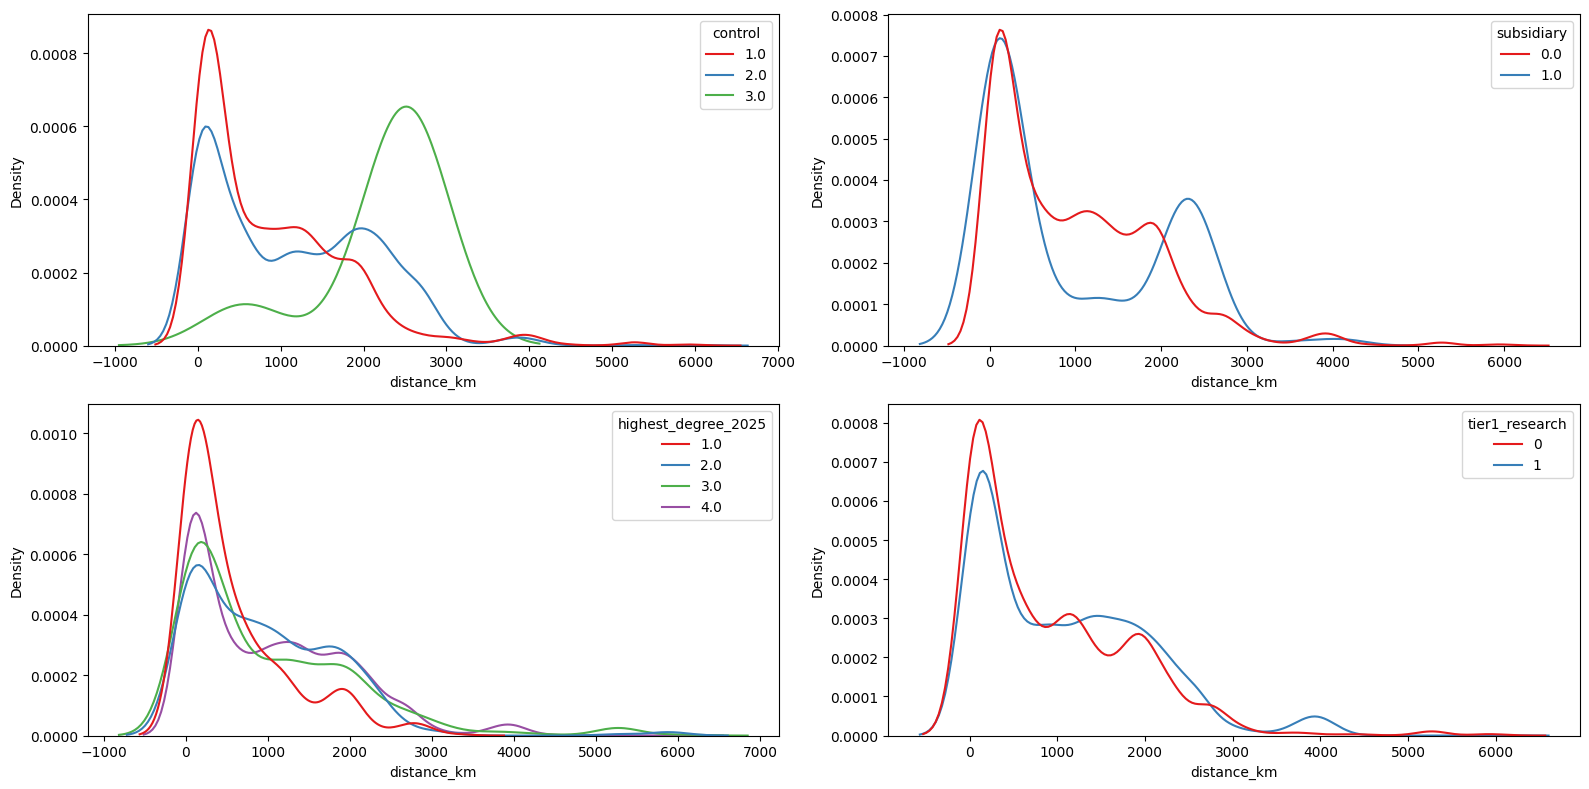

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
for i, huevar in enumerate(
    ["control", "subsidiary", "highest_degree_2025", "tier1_research"]
):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(
        data=ff_df,  # .loc[ff_df.corporate_foundation == 1],  # .loc[ff_df.family == 0],
        x="distance_km",
        hue=huevar,
        palette="Set1",
        common_norm=False,
    )

fig.tight_layout()

## Compare temporal distribution of grantmaking between two methods 

In [7]:
# Read Will data
will_df = pd.read_csv("projects/foundation/will/outputs/final_datasets/df_ff.csv")
# will_grantmakers = list(will_df.loc[will_df.FF_INTEREST == "X"].GRANTMAKER.unique())
# pd.Series(sorted(will_grantmakers)).to_clipboard()

# adjust will's data for inflation with his code
will_df.columns = [x.lower().replace(" ", "_") for x in will_df.columns.values]
cpi_data = {
    2003: 184,
    2004: 188.9,
    2005: 195.3,
    2006: 201.6,
    2007: 207.3,
    2008: 215.3,
    2009: 214.5,
    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 233,
    2014: 236.7,
    2015: 237,
    2016: 240,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271,
    2022: 292.7,
    2023: 304.7,
}

# CPI on January 1st, 2023 (replace with actual value)
cpi_2023 = 304.7


def adjust_for_inflation(row):
    year = row["year_authorized"]
    grant_amount = row["grant_amount"]

    # Get the CPI for the year the grant was authorized
    cpi_year = cpi_data.get(year, None)

    if cpi_year is None:
        return None  # Or handle missing CPI data as needed

    # Calculate the inflation adjustment factor
    inflation_factor = cpi_2023 / cpi_year

    # Calculate the adjusted grant amount
    return grant_amount * inflation_factor


will_df["grant_amount_2023_usd"] = will_df.apply(adjust_for_inflation, axis=1)

### Total Fossil-fuel foundation grant spending through time

#### Figure comparing two data-gathering methods

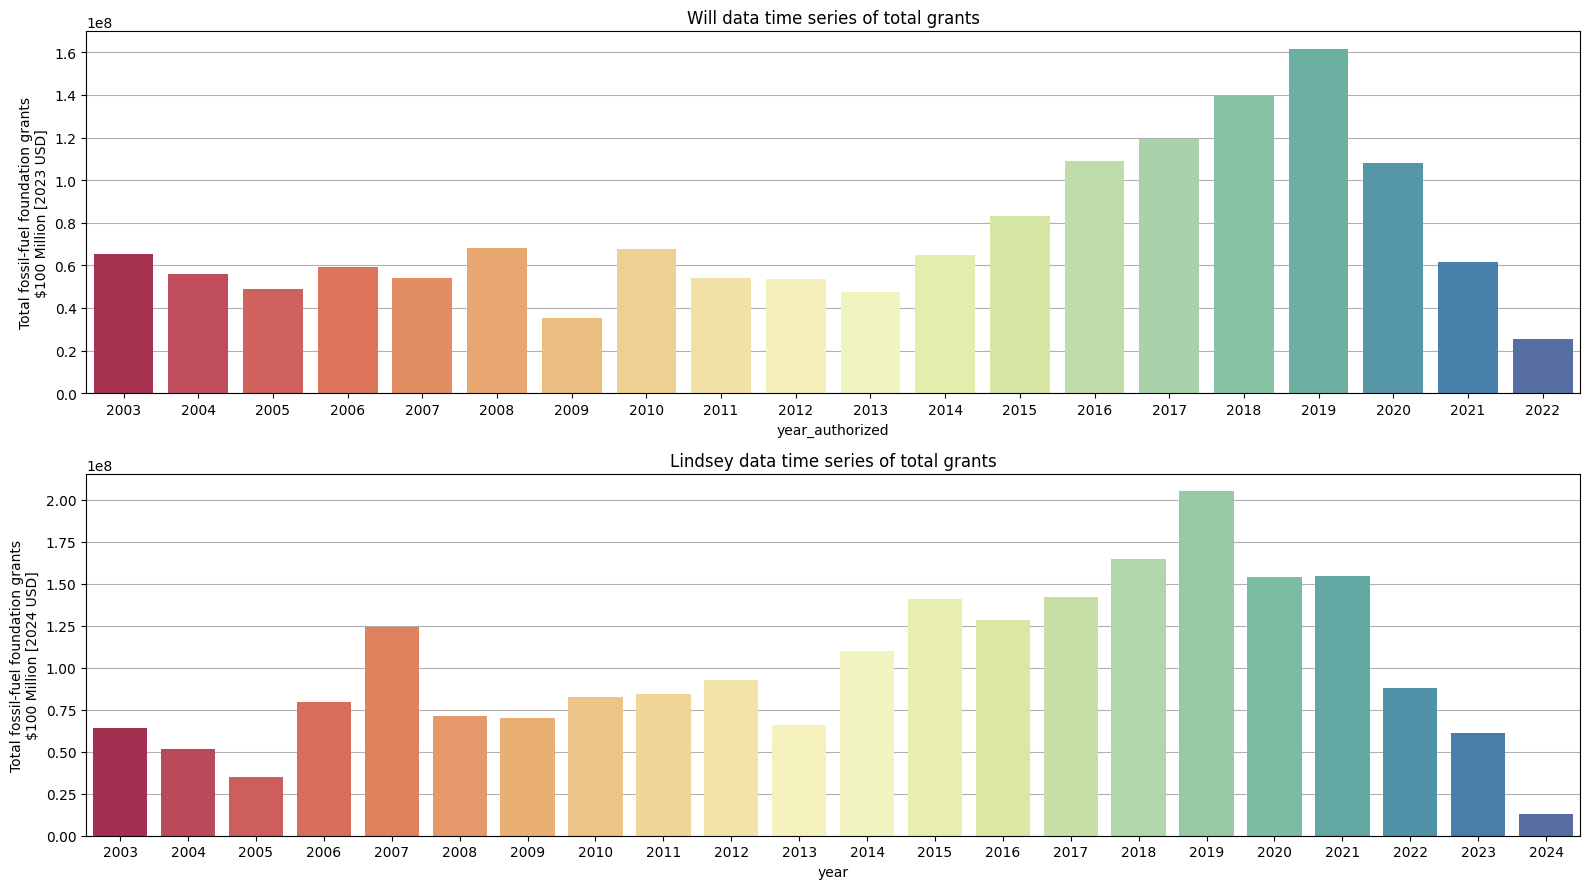

In [16]:
data_df = (
    will_df[["grant_amount_2023_usd", "year_authorized"]]
    .groupby("year_authorized")
    .sum()
    .reset_index()
)
fig, axes = plt.subplots(2, 1, figsize=(16, 9))
# plot will data, through time
ax = axes[0]
ax.grid(axis="y")
sns.barplot(
    ax=ax,
    data=data_df,
    x="year_authorized",
    y="grant_amount_2023_usd",
    palette="Spectral",
)
ax.set_axisbelow(True)  # put gridlines below bars
ax.set_ylabel("Total fossil-fuel foundation grants\n$100 Million [2023 USD]")
ax.set_title("Will data time series of total grants")

# plot lindsey data, through time
ax = axes[1]
data_df = ff_df[["grant_amount_2024_usd", "year"]].groupby("year").sum().reset_index()
ax.grid(axis="y")
sns.barplot(
    ax=ax, data=data_df, x="year", y="grant_amount_2024_usd", palette="Spectral"
)
ax.set_axisbelow(True)  # put gridlines below bars
ax.set_ylabel("Total fossil-fuel foundation grants\n$100 Million [2024 USD]")
ax.set_title("Lindsey data time series of total grants")

plt.tight_layout()
fig.savefig("comparison_between_will_lindsey_method.png")

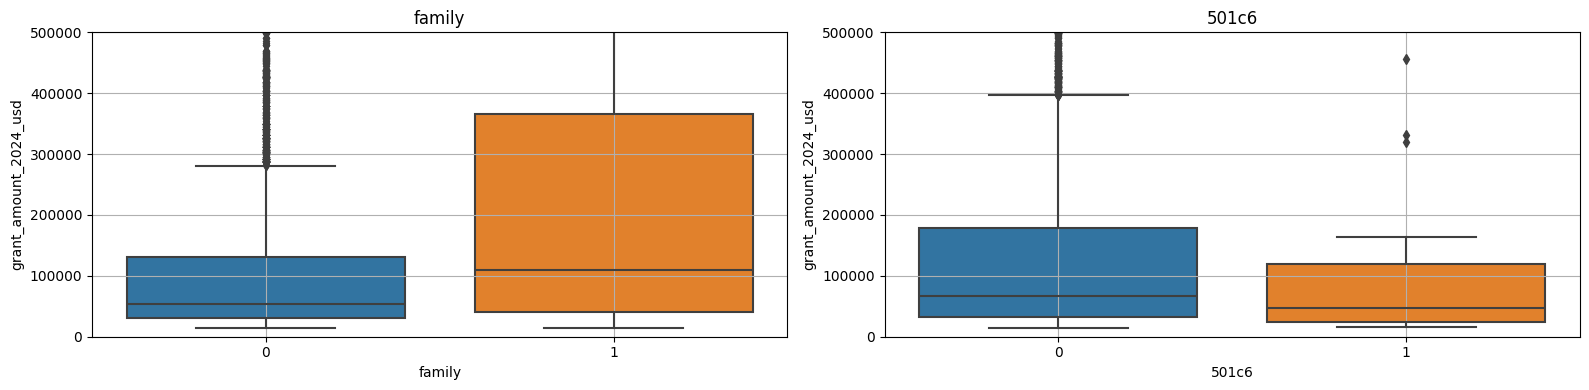

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
for i, var in enumerate(["family", "501c6"]):
    sns.boxplot(
        ax=ax[i],
        data=ff_df[["grant_amount_2024_usd", var]],
        y="grant_amount_2024_usd",
        x=var,
    )
    ax[i].set_title(var)
    ax[i].set_ylim([0, 0.5e6])
    ax[i].grid()
plt.tight_layout()
fig.savefig("grant_size_family_vs_nonfamily_501c3_vs_501c6.png")

In [10]:
# name of carnegie variable: [value when 'yes', value when 'no]
data_dict = {
    "landgrant": [1, 2],
    "medical": [1, 0],
    "hbcu": [1, 0],
    "rpu": [1, 0],
    "womenonly": [1, 0],
    "tribal": [1, 0],
    "hsi": [1, 0],
    "pbi": [1, 0],
}


carnegie_all_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/foundation/data/carnegie_data_2025.csv"
)
student_enrollment_col = "size_avg"
total_students = carnegie_all_df[student_enrollment_col].sum()

total_grants = ff_df.grant_amount_2024_usd.sum()


for var, yn in data_dict.items():
    print(var)
    g_df = ff_df[[var, "grant_amount_2024_usd"]].groupby(var).sum() / total_grants
    # print(g_df)
    s_df = (
        carnegie_all_df[[student_enrollment_col, var]].groupby(var).sum()
        / total_students
    )
    # print(s_df)
    var_df = g_df.merge(s_df, right_index=True, left_index=True)
    var_df.index = ["yes" if x == yn[0] else "no" for x in var_df.index]
    print(var_df)
    print("")

landgrant
     grant_amount_2024_usd  size_avg
yes               0.179084  0.085869
no                0.803959  0.914131

medical
     grant_amount_2024_usd  size_avg
no                0.564080  0.824376
yes               0.418964  0.175624

hbcu
     grant_amount_2024_usd  size_avg
no                0.957466  0.986167
yes               0.025577  0.013833

rpu
     grant_amount_2024_usd  size_avg
no                0.872057  0.791357
yes               0.110987  0.208643

womenonly
     grant_amount_2024_usd  size_avg
no                0.973236  0.997512
yes               0.009808  0.002488

tribal
     grant_amount_2024_usd  size_avg
no                0.982683  0.999038
yes               0.000360  0.000962

hsi
     grant_amount_2024_usd  size_avg
no                0.843782  0.718348
yes               0.139262  0.281652

pbi
     grant_amount_2024_usd  size_avg
no                0.979144  0.982819
yes               0.003900  0.017181



### Universities with most fossil-fuel foundation funding

In [11]:
ff_df[["grant_amount", "grant_amount_2024_usd", "carnegie_matched"]].groupby(
    "carnegie_matched"
).sum().sort_values(by="grant_amount_2024_usd", ascending=False).head(50)

,grant_amount,grant_amount_2024_usd
carnegie_matched,,
George Mason University,154934886.0,1.994826e+08
University of Colorado Denver/Anschutz Medical Campus,104429541.0,1.329539e+08
University of Nebraska-Lincoln,53532486.0,6.813063e+07
Harvard University,46734752.0,6.197410e+07
Georgia Institute of Technology-Main Campus,45119314.0,5.571728e+07
Icahn School of Medicine at Mount Sinai,40975000.0,5.435735e+07
University of Colorado Boulder,32722842.0,4.854550e+07
Arizona State University Campus Immersion,35152139.0,4.313543e+07
Bradley University,26586245.0,3.876368e+07


### Top spenders (grantmakers/foundations)

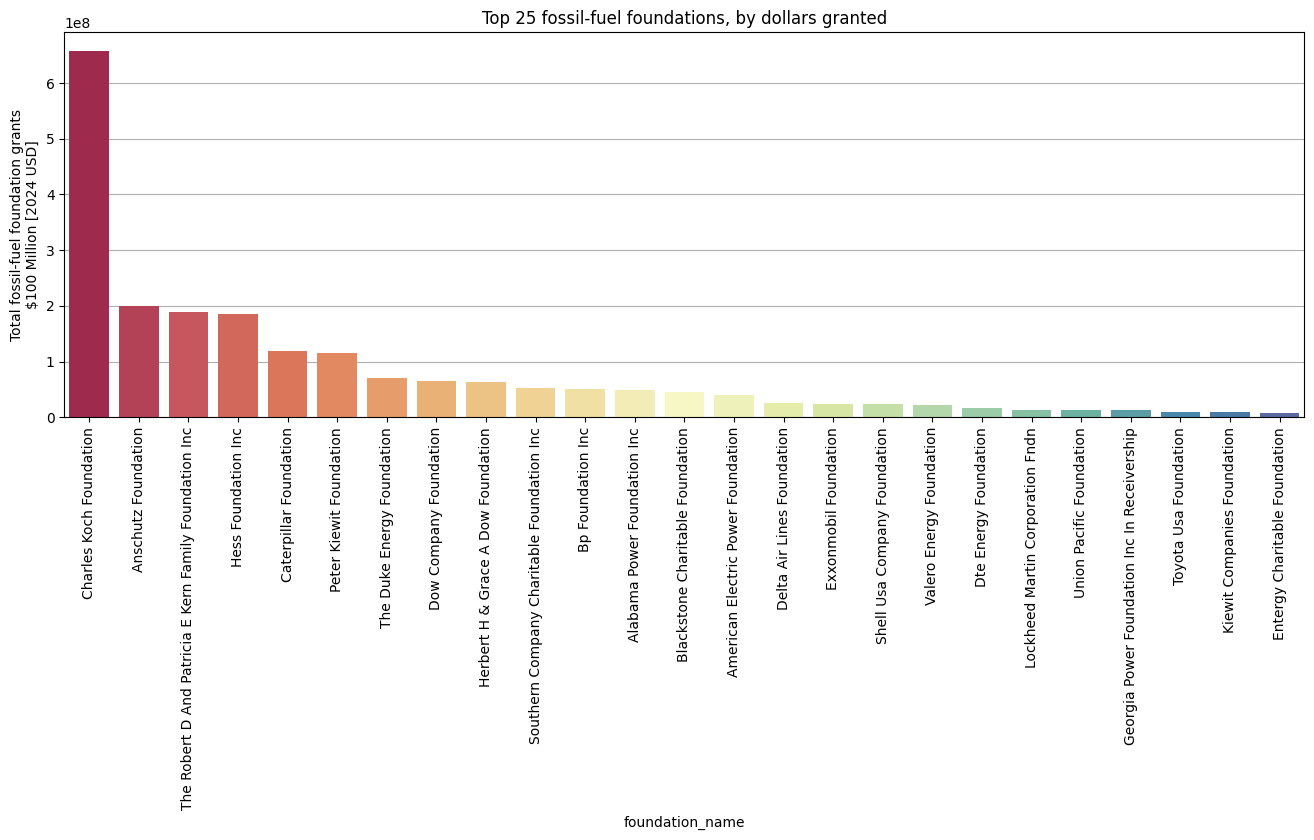

In [20]:
n_orgs = 25

data_df = (
    ff_df[
        [
            "grant_amount_2024_usd",
            "foundation_name",
        ]
    ]
    .groupby(["foundation_name"])
    .sum()
    .sort_values(by="grant_amount_2024_usd", ascending=False)
    .head(n_orgs)
    .reset_index()
)


fig, ax = plt.subplots(1, 1, figsize=(16, 5))
ax.grid(axis="y")
sns.barplot(
    ax=ax,
    data=data_df,
    x="foundation_name",
    y="grant_amount_2024_usd",
    palette="Spectral",
)
ax.set_axisbelow(True)  # put gridlines below bars
ax.set_ylabel("Total fossil-fuel foundation grants\n$100 Million [2024 USD]")
ax.set_title(f"Top {n_orgs:.0f} fossil-fuel foundations, by dollars granted")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
fig.savefig("top_grantmkers_2024usd.png")

Text(0.5, 1.0, 'Family and corporate fossil-fuel foundations have similar giving patterns when it comes to research institutions')

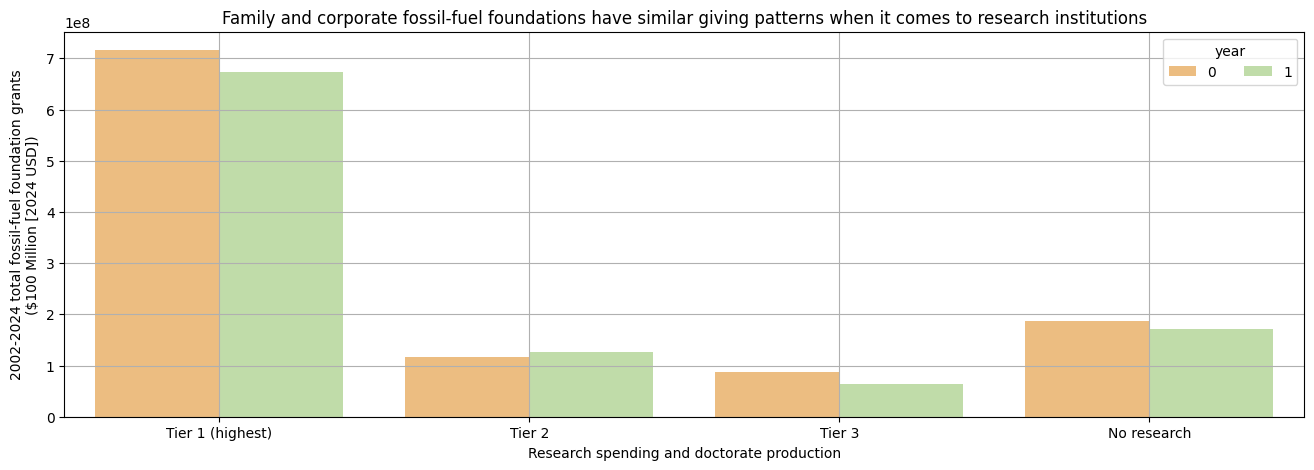

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
col = "research2025"
ff_df["year"] = ff_df["year"].astype(int)
sns.barplot(
    ax=ax,
    data=ff_df[["family", "grant_amount_2024_usd", col]]
    .groupby(["family", col])
    .sum()
    .reset_index(),
    palette="Spectral",
    # sns.color_palette("Spectral", as_cmap=True),
    y="grant_amount_2024_usd",
    x=col,
    hue="family",
    order=[1, 2, 3, -2],
)
ax.legend(ncol=2, loc="best", title="year")
ax.set_xticklabels(["Tier 1 (highest)", "Tier 2", "Tier 3", "No research"])
ax.set_xlabel("Research spending and doctorate production")
ax.grid("on")
ax.set_ylabel(
    "2002-2024 total fossil-fuel foundation grants\n($100 Million [2024 USD])"
)
ax.set_title(
    "Family and corporate fossil-fuel foundations have similar giving patterns when it comes to research institutions"
)

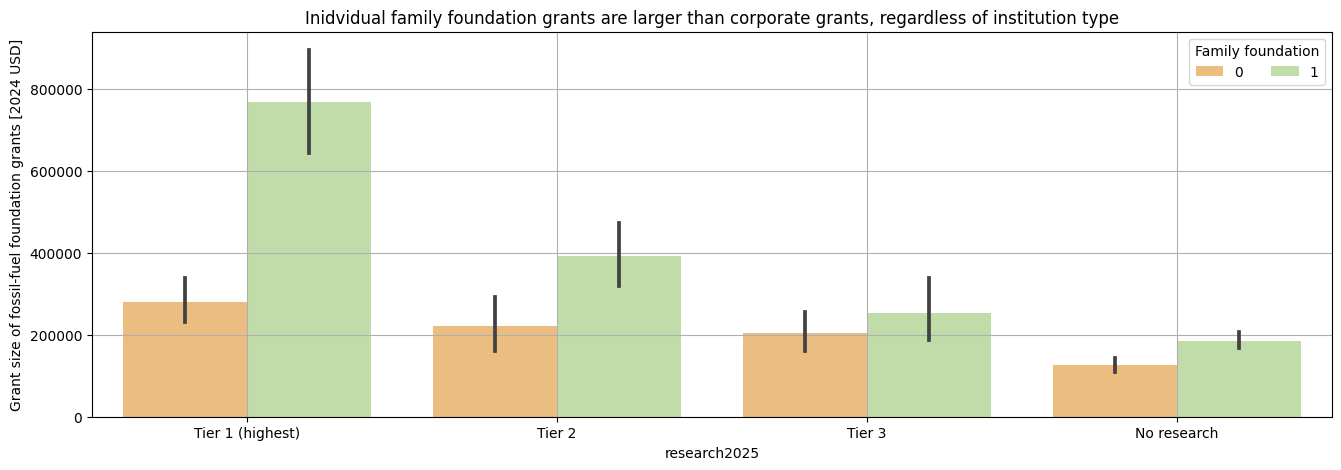

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))
col = "research2025"
ff_df["year"] = ff_df["year"].astype(int)
sns.barplot(
    ax=ax,
    data=ff_df[["family", "grant_amount_2024_usd", col]],
    palette="Spectral",
    # sns.color_palette("Spectral", as_cmap=True),
    y="grant_amount_2024_usd",
    x=col,
    hue="family",
    order=[1, 2, 3, -2],
)
ax.legend(ncol=2, loc="best", title="Family foundation")
ax.set_xticklabels(["Tier 1 (highest)", "Tier 2", "Tier 3", "No research"])
# ax.set_xlabel("Research spending and doctorate production")
ax.grid("on")
ax.set_ylabel("Grant size of fossil-fuel foundation grants [2024 USD]")
ax.set_title(
    "Inidvidual family foundation grants are larger than corporate grants, regardless of institution type"
)
fig.savefig("individual_family_foundation_grants_vs_other_types.png")

<Axes: >

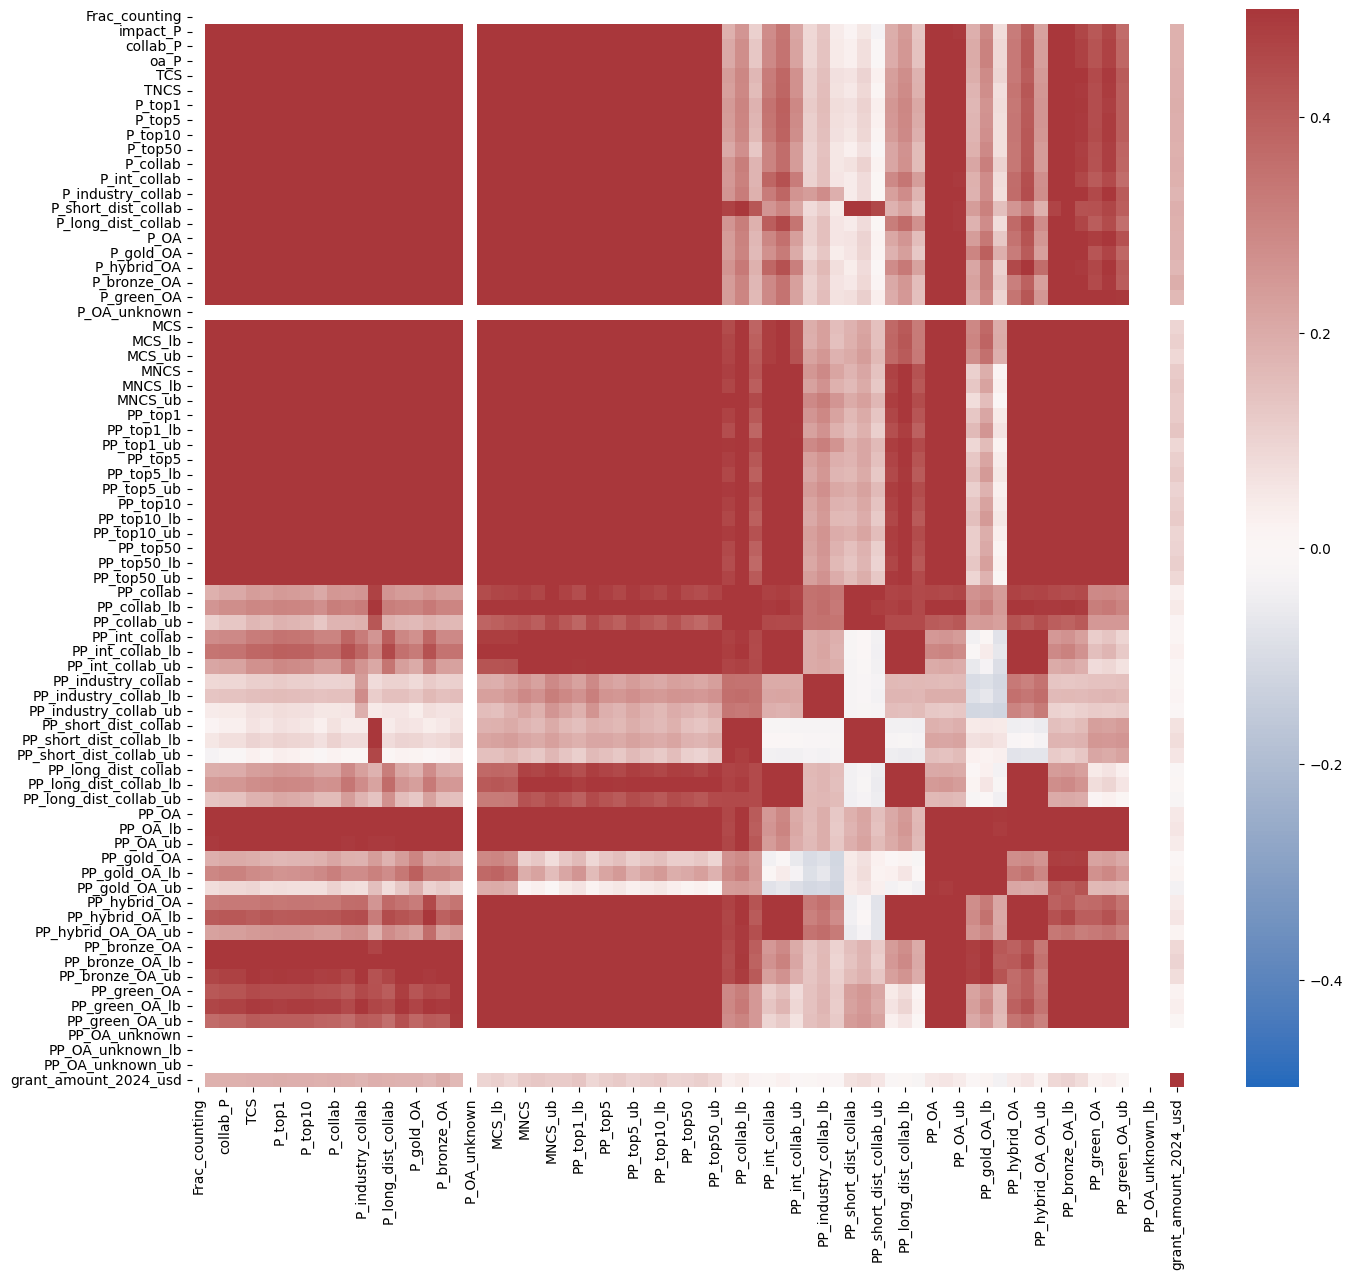

In [15]:
# look for correlations with school ratings
school_df = (
    ff_df[["grant_amount_2024_usd", "instnm"]].groupby("instnm").sum().reset_index()
)
leiden_df = pd.read_csv(
    "/Users/lindseygulden/dev/leg-up-private/projects/foundation/data/mean_cwts.csv"
)
leiden_df = leiden_df.merge(school_df, left_on="carnegie_name", right_on="instnm")
numeric_cols = leiden_df.select_dtypes(include=["number"]).columns.tolist()
fig, ax = plt.subplots(1, 1, figsize=(16, 14))
sns.heatmap(
    ax=ax, data=leiden_df[numeric_cols].corr(), cmap="vlag", vmin=-0.5, vmax=0.5
)

## What grantmaker-recipient compbinations are most likely to be in the same or neighboring states?

In [22]:
ff_df["public_control"] = [1 if p == 1 else 0 for p in ff_df.control]
ff_df["private_control"] = [abs(p - 1) for p in ff_df.public_control]
ff_df["not_subsidiary"] = [abs(s - 1) for s in ff_df.subsidiary]
ff_df["interest_group"] = [
    1 if (f == 0) & (c == 0) else 0
    for f, c in zip(ff_df.family, ff_df.corporate_foundation)
]

print(
    " --- Odds of grantmaker & recipient being in the same or neighboring state (with 95% CI in brackets):"
)
for var in [
    "tier1_research",
    "subsidiary",
    "corporate_foundation",
    "family",
    "interest_group",
    "public_control",
    "hbcu",
    "womenonly",
]:
    or_df = (
        ff_df[["same_or_neighbor", "not_same_or_neighbor", var]]
        .loc[ff_df.research2025.isin([1, -2])]
        .groupby(var)
        .sum()
    )

    oddsratio, lb, ub = odds_ratio(
        or_df.loc[1, :].to_list(),
        or_df.loc[0, :].to_list(),
    )

    print(f"     -> {var},  odds ratio = {oddsratio:.4f} [{lb:.4f},{ub:.4f}]")

 --- Odds of grantmaker & recipient being in the same or neighboring state (with 95% CI in brackets):
     -> tier1_research,  odds ratio = 0.6536 [0.5886,0.7256]
     -> subsidiary,  odds ratio = 2.1374 [1.8125,2.5205]
     -> corporate_foundation,  odds ratio = 3.5451 [3.1389,4.0039]
     -> family,  odds ratio = 0.3223 [0.2861,0.3631]
     -> interest_group,  odds ratio = 0.6814 [0.3648,1.2729]
     -> public_control,  odds ratio = 2.0011 [1.7968,2.2285]
     -> hbcu,  odds ratio = 2.7144 [1.8782,3.9227]
     -> womenonly,  odds ratio = 13.4308 [3.1713,56.8808]
